In [5]:

import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from datetime import timedelta
#from main import compare_columns
import folium
from folium.plugins import HeatMap
from folium import plugins
#import seaborn as sns

df = pd.read_csv('./data/crime.csv')
'''
#convert relevant column data into datetime objects
df['REPORTED_DATE']=pd.to_datetime(df.REPORTED_DATE)
df['FIRST_OCCURRENCE_DATE']=pd.to_datetime(df.FIRST_OCCURRENCE_DATE)
df['LAST_OCCURRENCE_DATE']=pd.to_datetime(df.LAST_OCCURRENCE_DATE)

#crime breakdown within each district
temp=df[['REPORTED_DATE','DISTRICT_ID','OFFENSE_CATEGORY_ID']]
for district in range(1,8):
    temp2=temp[temp['DISTRICT_ID']==district].drop('DISTRICT_ID',axis=1)
    temp2=temp2.groupby([temp2.REPORTED_DATE.dt.year,temp2.OFFENSE_CATEGORY_ID]).agg('count')
    temp2=temp2.unstack(level=0).plot(kind='bar').legend(loc=(1.2,0))
    plt.title('District '+str(district))
    plt.show()
'''



df['REPORTED_DATE']=df.REPORTED_DATE.apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%Y %I:%M:%S %p'))
df['year']=df.REPORTED_DATE.apply(lambda x:x.strftime('%Y'))
df['month']=df.REPORTED_DATE.apply(lambda x:x.strftime('%m'))
df['hour']=df.REPORTED_DATE.apply(lambda x:x.strftime('%H'))

#print(df.head())

data_IS_TRAFFIC=df[df.IS_TRAFFIC==1]
#print(data_IS_TRAFFIC.head())
'''According to the map,you can see the distribution of traffic-accident by year clearly.If the circle is more large,the traffic-accidents are happened more frequently in this area. I only show top 2000 data on the map.Since it can not show on the map if the data size too large in KAGGLE.'''
data_IS_TRAFFIC=data_IS_TRAFFIC[:2000]
colors = {'2014' : 'red', '2015' : 'blue','2016' :'green','2017':'brown','2018':'plum','2019':'purple'}
Long=data_IS_TRAFFIC.GEO_LON.mean()
Lat=data_IS_TRAFFIC.GEO_LAT.mean()
data_IS_TRAFFIC_map=folium.Map([Lat,Long],zoom_start=12)
for i in range(len(data_IS_TRAFFIC.groupby(['GEO_LAT','GEO_LON'])['INCIDENT_ID'].agg('count').index)):
    lat,lon=data_IS_TRAFFIC.groupby(['GEO_LAT','GEO_LON'])['INCIDENT_ID'].agg('count').index[i]
    folium.Circle(location=[lat,lon],
    popup=data_IS_TRAFFIC.iloc[i]['OFFENSE_TYPE_ID'],
    radius=int(data_IS_TRAFFIC.groupby(['GEO_LAT','GEO_LON'])['INCIDENT_ID'].agg('count')[i])*70,
    fill=True,
    fill_color=colors[data_IS_TRAFFIC['year'].iloc[i]],
    fill_opacity=0.7,).add_to(data_IS_TRAFFIC_map)

data_IS_TRAFFIC_map


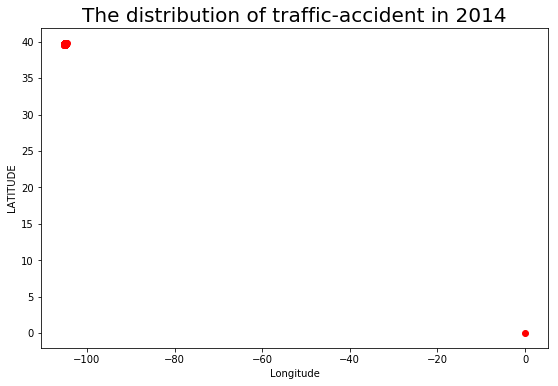

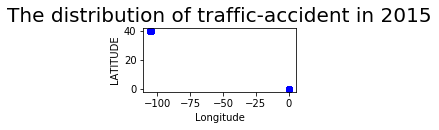

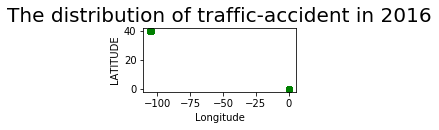

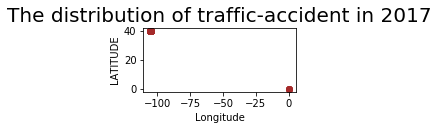

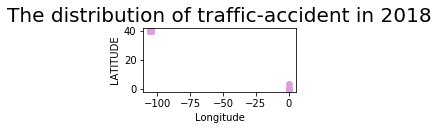

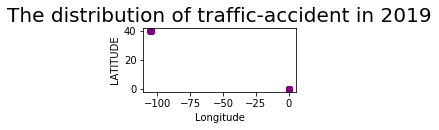

In [6]:
data_IS_TRAFFIC=df[df.IS_TRAFFIC==1]
plt.figure(figsize=(20,20))
for i in range(6):
    traffic=data_IS_TRAFFIC[data_IS_TRAFFIC.year==str(2014+i)]
    plt.subplot(3,2,i+1)
    plt.scatter('GEO_LON', 'GEO_LAT', data=traffic, c=colors[traffic['year'].iloc[0]])
    plt.title("The distribution of traffic-accident in "+str(2014+i),size=20)
    plt.xlabel('Longitude')
    plt.ylabel('LATITUDE')
    plt.show()